In [18]:
import pandas as pd
dic = """    
    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's"""
df = pd.read_csv("hou_all.csv")
df.head()
dic


"    \n    1. CRIM      per capita crime rate by town\n    2. ZN        proportion of residential land zoned for lots over \n                 25,000 sq.ft.\n    3. INDUS     proportion of non-retail business acres per town\n    4. CHAS      Charles River dummy variable (= 1 if tract bounds \n                 river; 0 otherwise)\n    5. NOX       nitric oxides concentration (parts per 10 million)\n    6. RM        average number of rooms per dwelling\n    7. AGE       proportion of owner-occupied units built prior to 1940\n    8. DIS       weighted distances to five Boston employment centres\n    9. RAD       index of accessibility to radial highways\n    10. TAX      full-value property-tax rate per $10,000\n    11. PTRATIO  pupil-teacher ratio by town\n    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks \n                 by town\n    13. LSTAT    % lower status of the population\n    14. MEDV     Median value of owner-occupied homes in $1000's"

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>,
        <Axes: title={'center': 'MIS'}>, <Axes: >]], dtype=object)

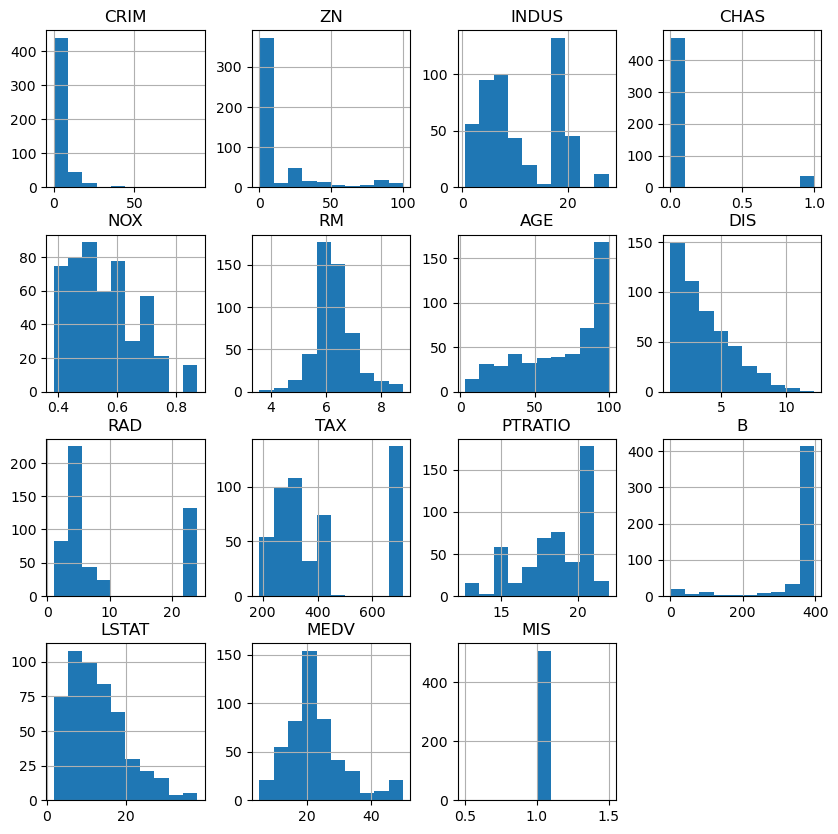

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(figsize=(10,10))

In [20]:
#import numpy as np
#np.random.seed(1)
'''
def traintest(data,ratios):
    """_summary_

    Args:
        data (_type_): the data to be shuffled
        ratios (float): percent of data for training

    Returns:
        train (_type_): the training data
        test (_type_): the testing data
    """
    np.random.permutation(data)
    train=data[:int(ratios*len(data))]
    test=data[int(ratios*len(data)):]
    return train,test
traindf ,testdf = traintest(df,0.85)
'''


In [21]:
#len(df)
#traindf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,MIS
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [24]:
#traindf["CHAS"].value_counts()

CHAS
0    395
1     35
Name: count, dtype: int64

In [25]:
#if chas is important if its not in one of it it would be bad
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["CHAS"]):
    stestset  = df.loc[test_index]
    strainset = df.loc[train_index]


In [26]:
stestset["CHAS"].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [27]:
strainset["CHAS"].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [32]:
corr_max = df.corr()
corr_max["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
MIS             NaN
Name: MEDV, dtype: float64

In [34]:
df.MIS.value_counts()

MIS
1    506
Name: count, dtype: int64

In [35]:
df.drop("MIS", axis=1, inplace=True)

In [36]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


array([[<Axes: xlabel='CRIM', ylabel='CRIM'>,
        <Axes: xlabel='AGE', ylabel='CRIM'>,
        <Axes: xlabel='B', ylabel='CRIM'>,
        <Axes: xlabel='MEDV', ylabel='CRIM'>],
       [<Axes: xlabel='CRIM', ylabel='AGE'>,
        <Axes: xlabel='AGE', ylabel='AGE'>,
        <Axes: xlabel='B', ylabel='AGE'>,
        <Axes: xlabel='MEDV', ylabel='AGE'>],
       [<Axes: xlabel='CRIM', ylabel='B'>,
        <Axes: xlabel='AGE', ylabel='B'>, <Axes: xlabel='B', ylabel='B'>,
        <Axes: xlabel='MEDV', ylabel='B'>],
       [<Axes: xlabel='CRIM', ylabel='MEDV'>,
        <Axes: xlabel='AGE', ylabel='MEDV'>,
        <Axes: xlabel='B', ylabel='MEDV'>,
        <Axes: xlabel='MEDV', ylabel='MEDV'>]], dtype=object)

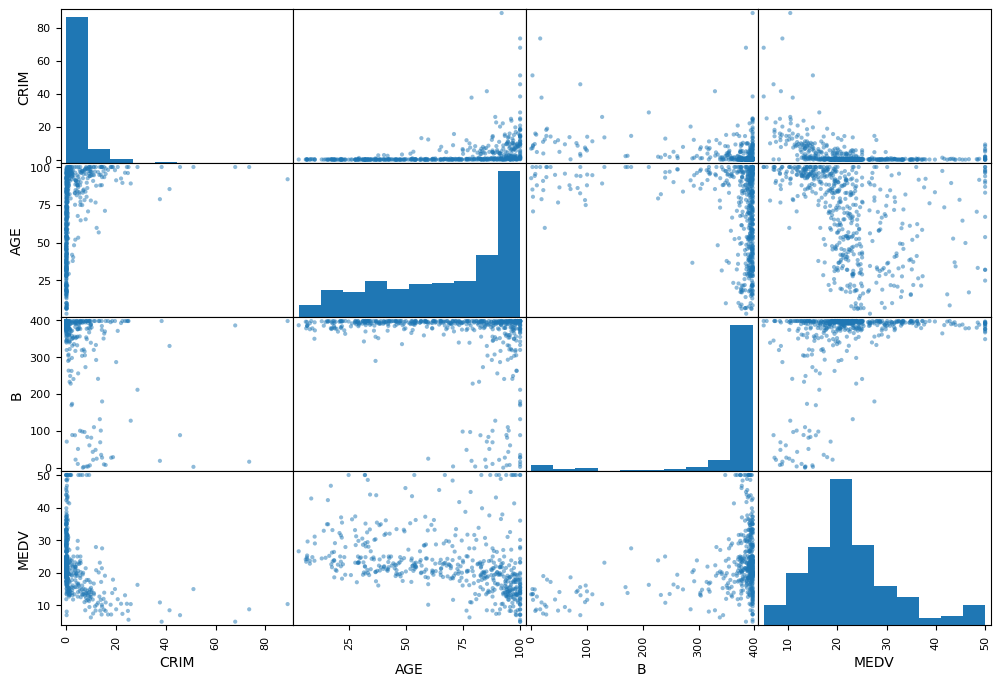

In [39]:
from pandas.plotting import scatter_matrix
attributes = ["CRIM","AGE","B","MEDV"]
scatter_matrix(df[attributes],figsize=(12,8))